## Scaling

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, f1_score, precision_score,plot_confusion_matrix,roc_auc_score

In [2]:
tips = sns.load_dataset('tips')
tips.head(1)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2


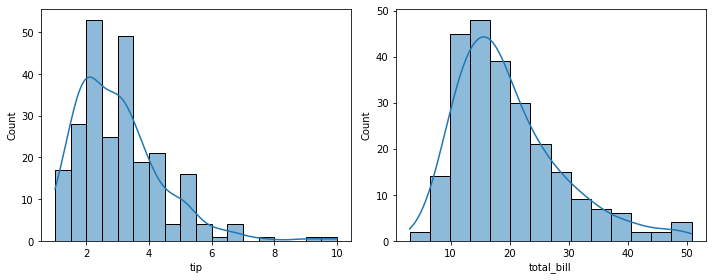

In [3]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(tips['tip'],kde=True)
plt.subplot(1,2,2)
sns.histplot(tips['total_bill'],kde=True)
plt.tight_layout()
plt.show()

In [4]:
tips[['tip','total_bill']].describe()

,tip,total_bill
count,244.000000,244.000000
mean,2.998279,19.785943
std,1.383638,8.902412
min,1.000000,3.070000
25%,2.000000,13.347500
50%,2.900000,17.795000
75%,3.562500,24.127500
max,10.000000,50.810000


# Coba di Scalling yaa

In [5]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [6]:
X = tips[['tip','total_bill']]

In [7]:
minmax = MinMaxScaler()
standard = StandardScaler()
robust = RobustScaler()

### MinMax Scaler

\begin{align}
z_i = \frac{x_i - min(x_i)}{max(x_i) - min(x_i)}
\end{align}



__Fit Transform hanya untuk Training__

In [8]:
X_minmax = minmax.fit_transform(X)
X_minmax = pd.DataFrame(X_minmax, columns = X.columns)
X_minmax

,tip,total_bill
0,0.001111,0.291579
1,0.073333,0.152283
2,0.277778,0.375786
3,0.256667,0.431713
4,0.290000,0.450775
...,...,...
239,0.546667,0.543779
240,0.111111,0.505027
241,0.111111,0.410557
242,0.083333,0.308965


In [9]:
X_minmax.describe() 

,tip,total_bill
count,244.000000,244.000000
mean,0.222031,0.350145
std,0.153738,0.186477
min,0.000000,0.000000
25%,0.111111,0.215281
50%,0.211111,0.308442
75%,0.284722,0.441087
max,1.000000,1.000000


MinMax Scaller merubah Scala Jadi 0-1


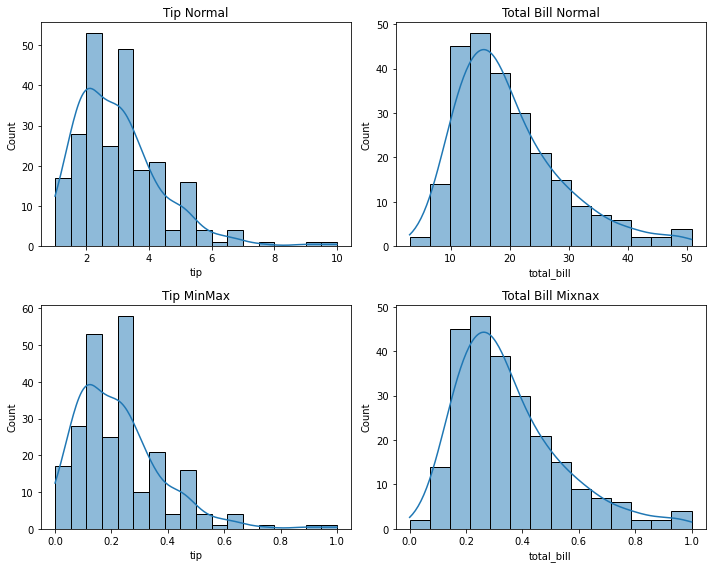

In [10]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.histplot(tips['tip'],kde=True)
plt.title('Tip Normal')
plt.subplot(2,2,2)
sns.histplot(tips['total_bill'],kde=True)
plt.title('Total Bill Normal')

print('MinMax Scaller merubah Scala Jadi 0-1')

plt.subplot(2,2,3)
sns.histplot(X_minmax['tip'],kde=True)
plt.title('Tip MinMax')
plt.subplot(2,2,4)
sns.histplot(X_minmax['total_bill'],kde=True)
plt.title('Total Bill Mixnax')
plt.tight_layout()
plt.show()

### __Min selalu 0. Max Selalu 1__

### StandardScaler

\begin{align}
z_i = \frac{x_i - \bar{x}}{s}
\end{align}



In [11]:
X_standard = standard.fit_transform(X)
X_standard = pd.DataFrame(X_standard, columns = X.columns)
X_standard

,tip,total_bill
0,-1.439947,-0.314711
1,-0.969205,-1.063235
2,0.363356,0.137780
3,0.225754,0.438315
4,0.443020,0.540745
...,...,...
239,2.115963,1.040511
240,-0.722971,0.832275
241,-0.722971,0.324630
242,-0.904026,-0.221287


In [12]:
X_standard[['total_bill','tip']].describe()

,total_bill,tip
count,2.440000e+02,2.440000e+02
mean,-6.597637e-17,2.846297e-16
std,1.002056e+00,1.002056e+00
min,-1.881547e+00,-1.447189e+00
25%,-7.247111e-01,-7.229713e-01
50%,-2.241005e-01,-7.117518e-02
75%,4.886857e-01,4.086192e-01
max,3.492068e+00,5.070772e+00


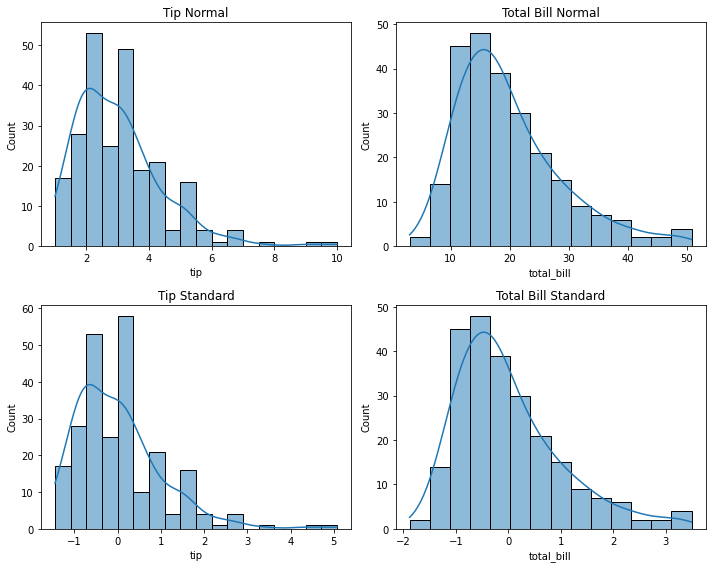

In [13]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.histplot(tips['tip'],kde=True)
plt.title('Tip Normal')
plt.subplot(2,2,2)
sns.histplot(tips['total_bill'],kde=True)
plt.title('Total Bill Normal')


plt.subplot(2,2,3)
sns.histplot(X_standard['tip'],kde=True)
plt.title('Tip Standard')
plt.subplot(2,2,4)
sns.histplot(X_standard['total_bill'],kde=True)
plt.title('Total Bill Standard')
plt.tight_layout()
plt.show()

### __Merubah Mean jadi 0 dan STD jadi 1__

### RobustScaler

\begin{align}
z_i = \frac{x_i - Q_1(x_i)}{Q_3(x_i) - Q_1(x_i)}
\end{align}
​


In [14]:
X_robust = robust.fit_transform(X)
X_robust = pd.DataFrame(X_robust, columns = X.columns)
X_robust

,tip,total_bill
0,-1.2096,-0.074675
1,-0.7936,-0.691558
2,0.3840,0.298237
3,0.2624,0.545918
4,0.4544,0.630334
...,...,...
239,1.9328,1.042208
240,-0.5760,0.870594
241,-0.5760,0.452226
242,-0.7360,0.002319


In [15]:
X_robust[['total_bill','tip']].describe()

,total_bill,tip
count,2.440000e+02,244.000000
mean,1.846886e-01,0.062898
std,8.258267e-01,0.885528
min,-1.365955e+00,-1.216000
25%,-4.125696e-01,-0.576000
50%,-1.647987e-16,0.000000
75%,5.874304e-01,0.424000
max,3.062616e+00,4.544000


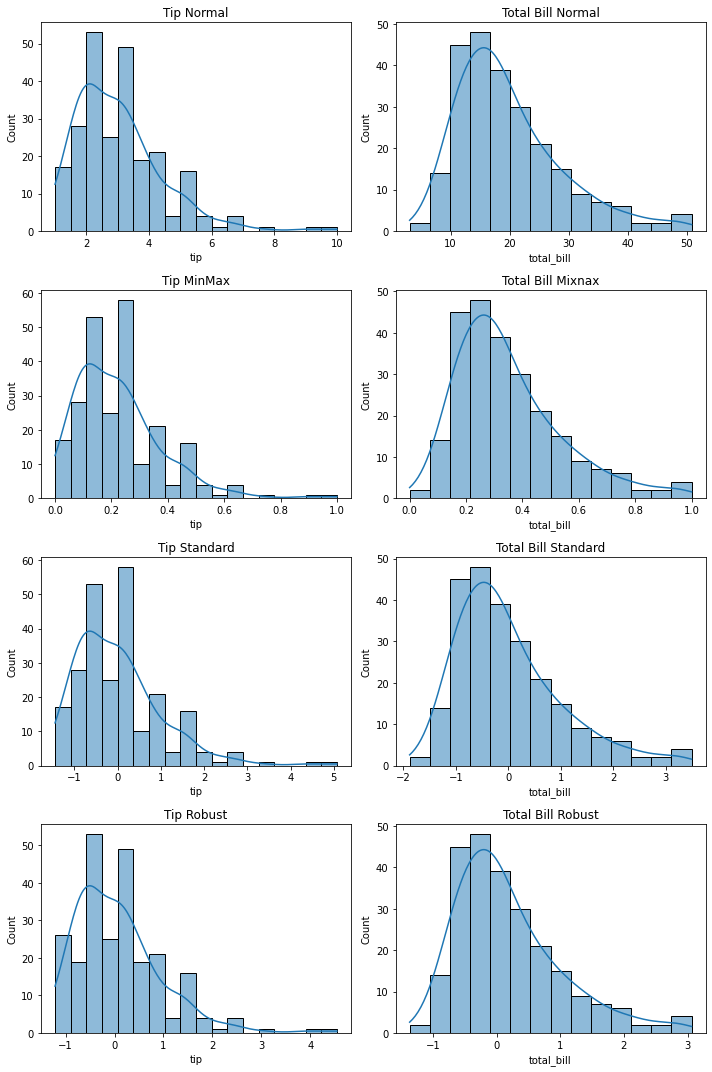

In [16]:
plt.figure(figsize=(10,15))
plt.subplot(4,2,1)
sns.histplot(tips['tip'],kde=True)
plt.title('Tip Normal')
plt.subplot(4,2,2)
sns.histplot(tips['total_bill'],kde=True)
plt.title('Total Bill Normal')


plt.subplot(4,2,3)
sns.histplot(X_minmax['tip'],kde=True)
plt.title('Tip MinMax')
plt.subplot(4,2,4)
sns.histplot(X_minmax['total_bill'],kde=True)
plt.title('Total Bill Mixnax')

plt.subplot(4,2,5)
sns.histplot(X_standard['tip'],kde=True)
plt.title('Tip Standard')
plt.subplot(4,2,6)
sns.histplot(X_standard['total_bill'],kde=True)
plt.title('Total Bill Standard')

plt.subplot(4,2,7)
sns.histplot(X_robust['tip'],kde=True)
plt.title('Tip Robust')
plt.subplot(4,2,8)
sns.histplot(X_robust['total_bill'],kde=True)
plt.title('Total Bill Robust')
plt.tight_layout()
plt.show()

## __Tidak ada yang dijanjikan di robust. tapi median mendekati 0__

# Encoding

> ## Pandas : Get_dummy

In [17]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [200]:
for i in 'sex smoker day time'.split():
    print(tips[i].value_counts())

Male      157
Female     87
Name: sex, dtype: int64
No     151
Yes     93
Name: smoker, dtype: int64
Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64
Dinner    176
Lunch      68
Name: time, dtype: int64


In [19]:
tips_dummy = pd.get_dummies(tips, columns = 'sex smoker day time'.split())
tips_dummy.head()

,total_bill,tip,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,1.01,2,0,1,0,1,0,0,0,1,0,1
1,10.34,1.66,3,1,0,0,1,0,0,0,1,0,1
2,21.01,3.50,3,1,0,0,1,0,0,0,1,0,1
3,23.68,3.31,2,1,0,0,1,0,0,0,1,0,1
4,24.59,3.61,4,0,1,0,1,0,0,0,1,0,1


You can see that each variables now has dummy variable as many as the number of category

> ## One Hot Encoding

In [20]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [21]:
transformer = ColumnTransformer([
    ('encoder',OneHotEncoder(),'sex smoker day time'.split())
])

In [22]:
tips_encoded = pd.DataFrame(transformer.fit_transform(tips))
tips_encoded

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
239,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
240,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
241,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
242,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [23]:
transformer.get_feature_names()

['encoder__x0_Female',
 'encoder__x0_Male',
 'encoder__x1_No',
 'encoder__x1_Yes',
 'encoder__x2_Fri',
 'encoder__x2_Sat',
 'encoder__x2_Sun',
 'encoder__x2_Thur',
 'encoder__x3_Dinner',
 'encoder__x3_Lunch']

In [24]:
tips_encoded.columns = transformer.get_feature_names()
tips_encoded = pd.concat([tips['total_bill tip size'.split()],tips_encoded],axis=1)
tips_encoded

,total_bill,tip,size,encoder__x0_Female,encoder__x0_Male,encoder__x1_No,encoder__x1_Yes,encoder__x2_Fri,encoder__x2_Sat,encoder__x2_Sun,encoder__x2_Thur,encoder__x3_Dinner,encoder__x3_Lunch
0,16.99,1.01,2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,10.34,1.66,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,21.01,3.50,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,23.68,3.31,2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,24.59,3.61,4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
240,27.18,2.00,2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
241,22.67,2.00,2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
242,17.82,1.75,2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


> ## Ordinal Encoding .map

In [25]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [26]:
import category_encoders as ce

In [27]:
tips_ordinal_encoded = tips.copy()

In [28]:
tips_ordinal_encoded.day.value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [29]:
tips_ordinal_encoded['day']=tips['day'].map({'Thur':1,'Fri':2,'Sat':3,'Sun':4})

In [30]:
tips_ordinal_encoded

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,4,Dinner,2
1,10.34,1.66,Male,No,4,Dinner,3
2,21.01,3.50,Male,No,4,Dinner,3
3,23.68,3.31,Male,No,4,Dinner,2
4,24.59,3.61,Female,No,4,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,3,Dinner,3
240,27.18,2.00,Female,Yes,3,Dinner,2
241,22.67,2.00,Male,Yes,3,Dinner,2
242,17.82,1.75,Male,No,3,Dinner,2


In [31]:
tips_ordinal_encoded.day.value_counts()

3    87
4    76
1    62
2    19
Name: day, dtype: int64

> ## ce.OrdinalEncoder

In [32]:
ordinal_mapping=[
    {'col':'day',
    'mapping':{None:0,'Thur':1,'Fri':2,'Sat':3,'Sun':4}}
]
ordinal_encoder = ce.OrdinalEncoder(cols='day',mapping=ordinal_mapping)
dford = ordinal_encoder.fit_transform(tips['day'])
dford

,day
0,4
1,4
2,4
3,4
4,4
...,...
239,3
240,3
241,3
242,3


In [33]:
tips_ordinal_encoded = pd.concat([tips,dford],axis=1)
tips_ordinal_encoded

,total_bill,tip,sex,smoker,day,time,size,day
0,16.99,1.01,Female,No,Sun,Dinner,2,4
1,10.34,1.66,Male,No,Sun,Dinner,3,4
2,21.01,3.50,Male,No,Sun,Dinner,3,4
3,23.68,3.31,Male,No,Sun,Dinner,2,4
4,24.59,3.61,Female,No,Sun,Dinner,4,4
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2,3
241,22.67,2.00,Male,Yes,Sat,Dinner,2,3
242,17.82,1.75,Male,No,Sat,Dinner,2,3


In [34]:
ordinal_mapping=[
    {'col':'day',
    'mapping':{None:0,'Thur':1,'Fri':2,'Sat':3,'Sun':4}},
    {'col':'time',
    'mapping':{None:0,'Lunch':1,'Dinner':2}}
]
ordinal_encoder = ce.OrdinalEncoder(cols='day time'.split(),mapping=ordinal_mapping)
dford = ordinal_encoder.fit_transform(tips['day time'.split()])
dford

,day,time
0,4,2
1,4,2
2,4,2
3,4,2
4,4,2
...,...,...
239,3,2
240,3,2
241,3,2
242,3,2


>## Binary Encoding

In [35]:
binary_encoder = ce.BinaryEncoder(cols=['day'])
dfbin = binary_encoder.fit_transform(tips['day'])
dfbin

,day_0,day_1,day_2
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
239,0,1,0
240,0,1,0
241,0,1,0
242,0,1,0


In [36]:
tips_binary_encoded = pd.concat([tips,dfbin],axis=1)
tips_binary_encoded

,total_bill,tip,sex,smoker,day,time,size,day_0,day_1,day_2
0,16.99,1.01,Female,No,Sun,Dinner,2,0,0,1
1,10.34,1.66,Male,No,Sun,Dinner,3,0,0,1
2,21.01,3.50,Male,No,Sun,Dinner,3,0,0,1
3,23.68,3.31,Male,No,Sun,Dinner,2,0,0,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0,0,1
...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0,1,0
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0,1,0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0,1,0
242,17.82,1.75,Male,No,Sat,Dinner,2,0,1,0


In [37]:
day = pd.Series('Fri Sat Sun Thur'.split(),name='day')
binary_encoder.transform(day)

,day_0,day_1,day_2
0,1,0,0
1,0,1,0
2,0,0,1
3,0,1,1


# __1.A Exercise menggunakan Ridge/Lasso__

> ## Table of Content
1. data
1. preprocessing
1. data splitting
1. data transform
1. model fitting and evaluation
1. model properties

In [38]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import Ridge, Lasso

from sklearn.metrics  import mean_squared_error

### 1. Data

In [39]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### 2. Preprocessing

1. One Hot Encoding : sex, somker, time
1. binary coding : day
1. robust_scaler : total_bill
1. no treatment : size

In [40]:
transformer = ColumnTransformer([
    ('onehot',OneHotEncoder(drop='first'),'sex smoker time'.split()),
    ('binary',ce.BinaryEncoder(),['day']),
    ('robust',RobustScaler(),['total_bill'])
],remainder='passthrough')

### 3. Data Splitting

1. 70(train) : 30(test)

In [41]:
X = tips.drop(['tip'],axis=1)
y = tips['tip']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=10)

### 4. Data Transform

In [43]:
X_train.head()

,total_bill,sex,smoker,day,time,size
39,31.27,Male,No,Sat,Dinner,3
87,18.28,Male,No,Thur,Lunch,2
169,10.63,Female,Yes,Sat,Dinner,2
232,11.61,Male,No,Sat,Dinner,2
144,16.43,Female,No,Thur,Lunch,2


In [44]:
X_train_preprocessed = transformer.fit_transform(X_train)
X_test_preprocessed = transformer.transform(X_test)

In [45]:
X_trp_df = pd.DataFrame(X_train_preprocessed)
X_tsp_df = pd.DataFrame(X_test_preprocessed)
X_trp_df

,0,1,2,3,4,5,6,7
0,1.0,0.0,0.0,0.0,0.0,1.0,1.260554,3.0
1,1.0,0.0,1.0,0.0,1.0,0.0,0.081253,2.0
2,0.0,1.0,0.0,0.0,0.0,1.0,-0.613255,2.0
3,1.0,0.0,0.0,0.0,0.0,1.0,-0.524285,2.0
4,0.0,0.0,1.0,0.0,1.0,0.0,-0.086700,2.0
...,...,...,...,...,...,...,...,...
165,1.0,0.0,0.0,0.0,0.0,1.0,0.018611,3.0
166,1.0,0.0,0.0,0.0,1.0,1.0,0.380844,2.0
167,1.0,0.0,0.0,0.0,0.0,1.0,-0.372674,2.0
168,0.0,0.0,1.0,0.0,1.0,0.0,1.127099,6.0


In [46]:
transformer.transformers_

[('onehot', OneHotEncoder(drop='first'), ['sex', 'smoker', 'time']),
 ('binary', BinaryEncoder(), ['day']),
 ('robust', RobustScaler(), ['total_bill']),
 ('remainder', 'passthrough', [5])]

In [47]:
transformer.transformers_[0][1].get_feature_names()

array(['x0_Male', 'x1_Yes', 'x2_Lunch'], dtype=object)

In [48]:
transformer.transformers_[1][1].get_feature_names()

['day_0', 'day_1', 'day_2']

In [49]:
features = list(transformer.transformers_[0][1].get_feature_names()) + transformer.transformers_[1][1].get_feature_names() + ['total_bill scaled','size']
X_trp_df.columns = features
X_tsp_df.columns = features
X_trp_df

,x0_Male,x1_Yes,x2_Lunch,day_0,day_1,day_2,total_bill scaled,size
0,1.0,0.0,0.0,0.0,0.0,1.0,1.260554,3.0
1,1.0,0.0,1.0,0.0,1.0,0.0,0.081253,2.0
2,0.0,1.0,0.0,0.0,0.0,1.0,-0.613255,2.0
3,1.0,0.0,0.0,0.0,0.0,1.0,-0.524285,2.0
4,0.0,0.0,1.0,0.0,1.0,0.0,-0.086700,2.0
...,...,...,...,...,...,...,...,...
165,1.0,0.0,0.0,0.0,0.0,1.0,0.018611,3.0
166,1.0,0.0,0.0,0.0,1.0,1.0,0.380844,2.0
167,1.0,0.0,0.0,0.0,0.0,1.0,-0.372674,2.0
168,0.0,0.0,1.0,0.0,1.0,0.0,1.127099,6.0


In [50]:
X_tsp_df

,x0_Male,x1_Yes,x2_Lunch,day_0,day_1,day_2,total_bill scaled,size
0,0.0,0.0,0.0,0.0,1.0,1.0,-0.106673,3.0
1,1.0,1.0,0.0,0.0,0.0,1.0,0.263731,2.0
2,1.0,1.0,0.0,0.0,0.0,1.0,-0.324557,2.0
3,1.0,1.0,0.0,0.0,0.0,1.0,0.082161,4.0
4,1.0,1.0,0.0,0.0,0.0,1.0,-0.215615,2.0
...,...,...,...,...,...,...,...,...
69,1.0,0.0,1.0,0.0,1.0,0.0,2.161144,5.0
70,0.0,0.0,0.0,0.0,0.0,1.0,-0.211076,2.0
71,1.0,0.0,0.0,0.0,0.0,1.0,0.039492,2.0
72,1.0,0.0,0.0,0.0,1.0,1.0,0.862006,4.0


> ## Model Fitting and Evaluation

In [51]:
ridge = Ridge()
ridge.fit(X_trp_df, y_train)

Ridge()

In [52]:
y_pred=ridge.predict(X_tsp_df)
print('MSE :',mean_squared_error(y_test,y_pred))
print('RMSE :',np.sqrt(mean_squared_error(y_test,y_pred)))

MSE : 1.029092584694234
RMSE : 1.0144420065702298


> ## Model Properties

In [53]:
coef_table = pd.DataFrame({'feature': X_trp_df.columns,
                          'coef':ridge.coef_})
coef_table

,feature,coef
0,x0_Male,-0.143779
1,x1_Yes,-0.135949
2,x2_Lunch,0.140186
3,day_0,0.163201
4,day_1,0.026447
5,day_2,0.066672
6,total_bill scaled,1.169090
7,size,0.125055


## 1.B Apply Several Preprocessing Method to Modeling at Once Part 1B : Tree
> ## Table of Content
1. data
1. preprocessing
1. data splitting
1. data transform
1. model fitting and evaluation
1. model properties

In [54]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [55]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


> ## Preprocessing

preprocess v1 scheme :
1. One Hot Encoding : sex_smoker, time
1. Ordinal Encoding : day
1. No Treatment : size, total_bill

In [1]:
ordinal_mapping = [
    {'col' : 'day',
    'mapping':{None:0, 'Thur':1,'Fri':2,'Sat':3,'Sun':4}}
]

ordinal_encoder = ce.OrdinalEncoder(cols='day',mapping=ordinal_mapping)

NameError: name 'ce' is not defined

In [57]:
transformer = ColumnTransformer([
    ('onehot',OneHotEncoder(drop='first'),['sex','smoker','time']),
    ('ordinal',ordinal_encoder,['day'])
],remainder = 'passthrough')

preprocess v2:
1. One hot encoding : sex, smoker
1. Ordinal Encoding : time, day
1. No Treatment : size, total_bill

In [58]:
# Buat latian yang V2

> ## Data Splitting

In [59]:
X = tips.drop('tip',axis=1)
y = tips['tip']
features = X.columns

In [60]:
Xtr, Xts, ytr, yts=train_test_split(X,y,random_state=10)

> ## Data Transform

In [61]:
Xtr.head()

,total_bill,sex,smoker,day,time,size
58,11.24,Male,Yes,Sat,Dinner,2
1,10.34,Male,No,Sun,Dinner,3
2,21.01,Male,No,Sun,Dinner,3
68,20.23,Male,No,Sat,Dinner,2
184,40.55,Male,Yes,Sun,Dinner,2


> ### Fit Transform

In [62]:
Xtr_p = transformer.fit_transform(Xtr)
Xts_p = transformer.transform(Xts)

> ### Change from 2D array to DF

In [63]:
Xtr_p = pd.DataFrame(Xtr_p)
Xts_p = pd.DataFrame(Xts_p)

In [64]:
transformer.transformers_

[('onehot', OneHotEncoder(drop='first'), ['sex', 'smoker', 'time']),
 ('ordinal',
  OrdinalEncoder(cols=['day'],
                 mapping=[{'col': 'day',
                           'mapping': {None: 0, 'Fri': 2, 'Sat': 3, 'Sun': 4,
                                       'Thur': 1}}]),
  ['day']),
 ('remainder', 'passthrough', [0, 5])]

In [65]:
transformer.transformers_[0][1]

OneHotEncoder(drop='first')

In [66]:
transformer.transformers_[0][1].get_feature_names()

array(['x0_Male', 'x1_Yes', 'x2_Lunch'], dtype=object)

In [67]:
transformer.transformers_[1][1].get_feature_names()

['day']

In [68]:
new_features = list(transformer.transformers_[0][1].get_feature_names())+transformer.transformers_[1][1].get_feature_names()+['total_bill', 'size']

In [69]:
print(new_features)
print(features)

['x0_Male', 'x1_Yes', 'x2_Lunch', 'day', 'total_bill', 'size']
Index(['total_bill', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')


In [70]:
Xtr_p.columns = new_features
Xts_p.columns = new_features

In [71]:
display(Xtr_p.head())
display(Xts_p.head())

,x0_Male,x1_Yes,x2_Lunch,day,total_bill,size
0,1.0,1.0,0.0,3.0,11.24,2.0
1,1.0,0.0,0.0,4.0,10.34,3.0
2,1.0,0.0,0.0,4.0,21.01,3.0
3,1.0,0.0,0.0,3.0,20.23,2.0
4,1.0,1.0,0.0,4.0,40.55,2.0


,x0_Male,x1_Yes,x2_Lunch,day,total_bill,size
0,0.0,0.0,0.0,4.0,16.21,3.0
1,1.0,1.0,0.0,3.0,20.29,2.0
2,1.0,1.0,0.0,3.0,13.81,2.0
3,1.0,1.0,0.0,3.0,18.29,4.0
4,1.0,1.0,0.0,3.0,15.01,2.0


In [72]:
dtr = DecisionTreeRegressor(max_depth=3,random_state=24)
dtr.fit(Xtr_p, ytr)

DecisionTreeRegressor(max_depth=3, random_state=24)

In [73]:
y_pred = dtr.predict(Xts_p)
print('MSE :', mean_squared_error(yts,y_pred))
print('RMSE :', np.sqrt(mean_squared_error(yts,y_pred)))

MSE : 0.841431422596059
RMSE : 0.9172957116415943


> ## Model Properties

In [74]:
importance_table = pd.DataFrame({
    'importance':dtr.feature_importances_
},index=new_features)
importance_table

,importance
x0_Male,0.000000
x1_Yes,0.108978
x2_Lunch,0.000000
day,0.000000
total_bill,0.891022
size,0.000000


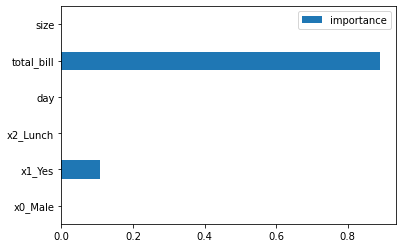

In [75]:
importance_table.plot(kind='barh')
plt.show()

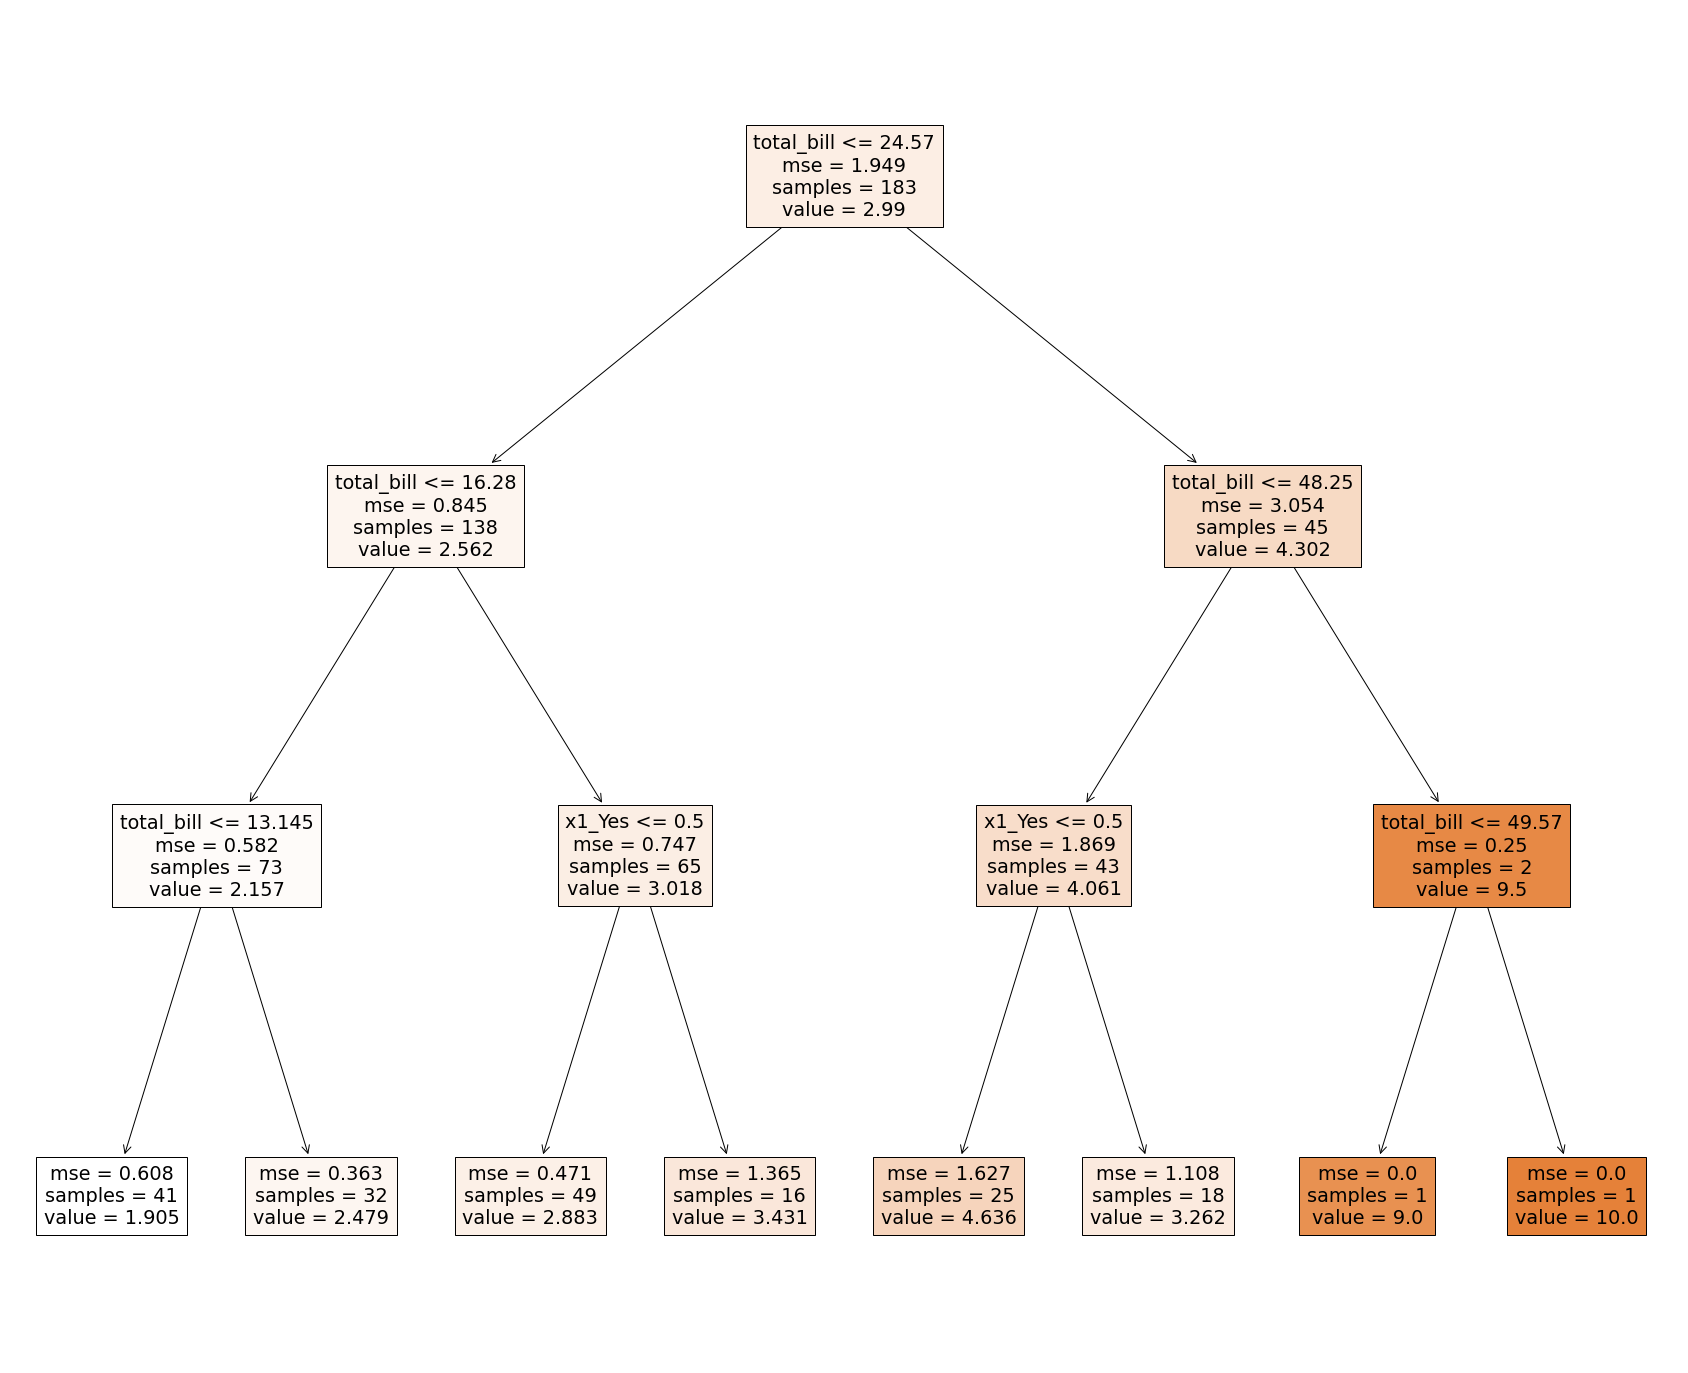

In [76]:
plt.figure(figsize=(30,25))
plot_tree(dtr,feature_names=new_features, filled=True)
plt.show()

# Outlier

In [77]:
x = list(np.random.uniform(155,165,100))
x = [round(i,2) for i in x]

y = [(2 + 0.35*i + np.asscalar(np.random.normal(0,1.5,1))) for i in x]
y = [round(i,2) for i in y]

y_real = [(2 + 0.35*i) for i in x]
y_real = [round(i,2) for i in y_real]


<ipython-input-77-c9a109010036>:4: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  y = [(2 + 0.35*i + np.asscalar(np.random.normal(0,1.5,1))) for i in x]


In [78]:
df_association = pd.DataFrame({
    'x':x,
    'y':y,
    'y_real':y_real
})

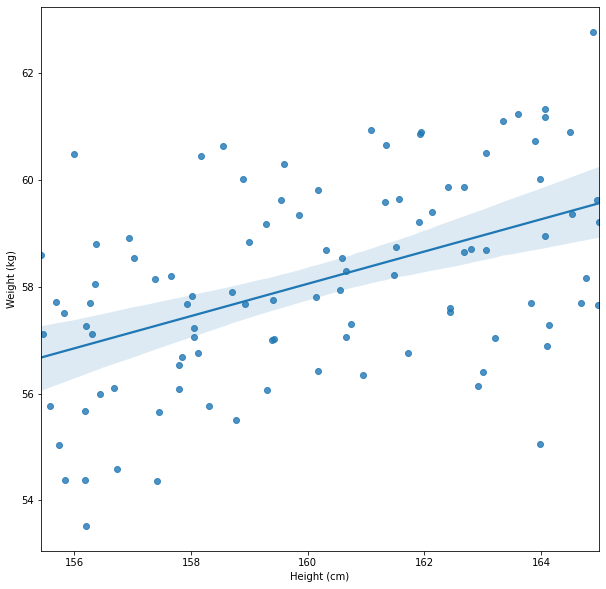

In [79]:
plt.figure(figsize=(10,10))
sns.regplot(x='x',y='y',data=df_association)
# sns.lineplot(x='x',y='y_real',data=df_association)
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

In [80]:
# Tidak ada outlier

## Global Outlier

In [81]:
x = [191,190]
x = [round(i,2) for i in x]

y = [(2 + 0.35*i + np.asscalar(np.random.normal(0,1.5,1))) for i in x]
y = [round(i,2) for i in y]

y_real = [(2 + 0.35*i) for i in x]
y_real = [round(i,2) for i in y_real]

df_add = pd.DataFrame({
    'x':x,
    'y':y,
    'y_real':y_real
})

df_association_outlier = df_association.append(df_add)


<ipython-input-81-438f40996c90>:4: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  y = [(2 + 0.35*i + np.asscalar(np.random.normal(0,1.5,1))) for i in x]


In [82]:
df_association_outlier

,x,y,y_real
0,163.21,57.05,59.12
1,162.92,56.15,59.02
2,157.85,56.69,57.25
3,158.01,57.83,57.30
4,163.98,60.02,59.39
...,...,...,...
97,164.10,56.90,59.43
98,155.69,57.72,56.49
99,162.68,59.86,58.94
0,191.00,70.01,68.85


> ### Global outlier weight

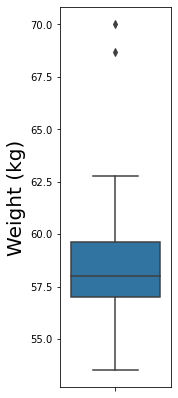

In [83]:
plt.figure(figsize=(2,7))
sns.boxplot(y=df_association_outlier['y'])
plt.ylabel('Weight (kg)',fontsize=20)
plt.show()

> ### Global Height Outlier

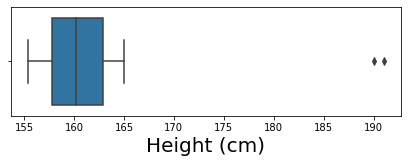

In [84]:
plt.figure(figsize=(7,2))
sns.boxplot(x=df_association_outlier['x'])
plt.xlabel('Height (cm)',fontsize=20)
plt.show()

In [85]:
from sklearn.linear_model import LinearRegression

> ## Contextual Outlier

In [86]:
x = list(np.random.uniform(155,175,100))
x = [round(i,2) for i in x]

y = [(2 + 0.35*i + np.asscalar(np.random.normal(0,1.5,1))) for i in x]
y = [round(i,2) for i in y]

y_real = [(2 + 0.35*i) for i in x]
y_real = [round(i,2) for i in y_real]


<ipython-input-86-11188d5fdd32>:4: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  y = [(2 + 0.35*i + np.asscalar(np.random.normal(0,1.5,1))) for i in x]


In [87]:
df_association = pd.DataFrame({
    'x':x,
    'y':y,
    'y_real':y_real
})

In [88]:
x = [155,157]

y = [66,67]

y_real = [(2 + 0.35*i) for i in x]
y_real = [round(i,2) for i in y_real]

df_add = pd.DataFrame({
    'x':x,
    'y':y,
    'y_real':y_real
})

df_association_contextual = df_association.append(df_add)


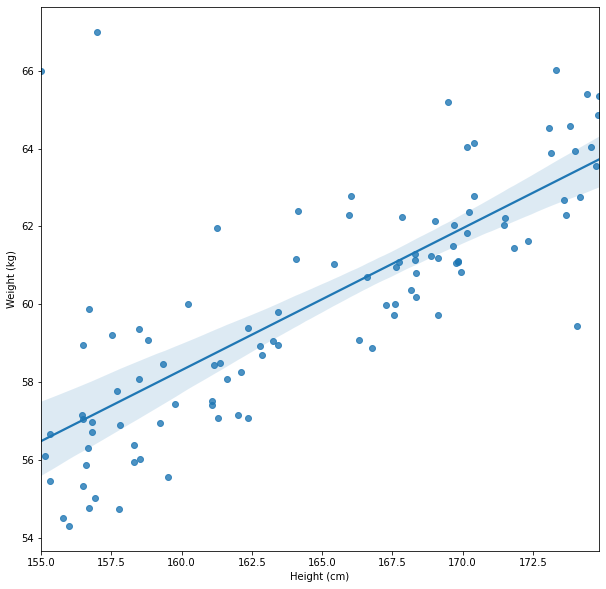

In [89]:
plt.figure(figsize=(10,10))
sns.regplot(x='x',y='y',data=df_association_contextual)
# sns.lineplot(x='x',y='y_real',data=df_association_contextual)
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

> ## Influential Observation

In [90]:
x = [170, 171, 173, 180]

y = [91, 95, 95, 100]

y_real = [(2 + 0.35*i) for i in x]
y_real = [round(i,2) for i in y_real]

df_add = pd.DataFrame({
    'x':x,
    'y':y,
    'y_real':y_real
})

df_association_influenced = df_association.append(df_add)


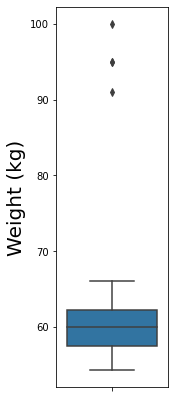

In [91]:
plt.figure(figsize=(2,7))
sns.boxplot(y=df_association_influenced['y'])
plt.ylabel('Weight (kg)',fontsize=20)
plt.show()

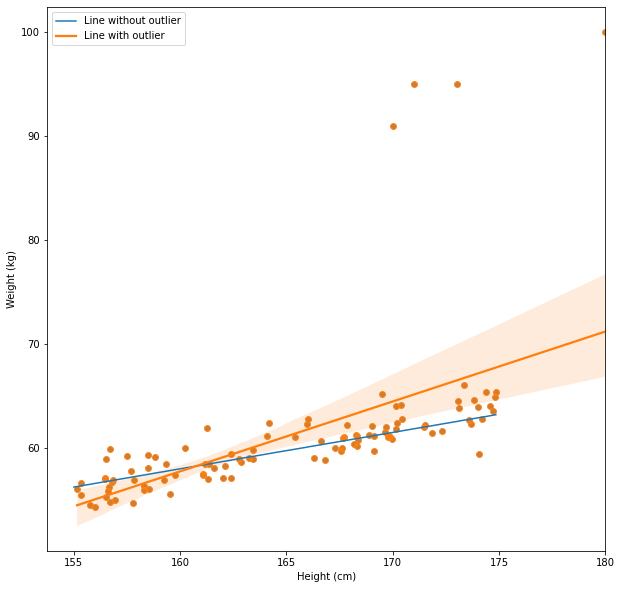

In [92]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='x',y='y',data=df_association_influenced)
sns.lineplot(x='x',y='y_real',data=df_association_contextual)
sns.regplot(x='x',y='y',data=df_association_influenced)
plt.legend(['Line without outlier','Line with outlier'],loc = 'upper left')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

# Bining -- Cara ManuaL

In [93]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


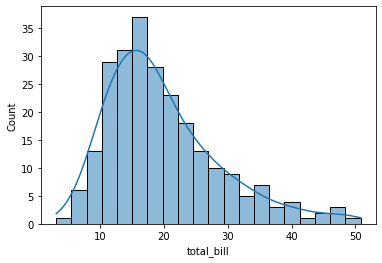

In [94]:
sns.histplot(tips['total_bill'],bins=20,kde=True)
plt.show()

In [95]:
tips2 = tips.copy()
tips2.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [96]:
tips2['total_bill_eqfreq'] = pd.qcut(tips2['total_bill'],5)
tips2['total_bill_eqfreq_encoded']=pd.qcut(tips2['total_bill'],5,labels=range(1,6))

In [97]:
tips2['total_bill_eqintv'] = pd.cut(tips2['total_bill'],5)
tips2['total_bill_eqintv_encoded']=pd.cut(tips2['total_bill'],5,labels=range(1,6))

In [98]:
tips2['total_bill total_bill_eqfreq total_bill_eqintv total_bill_eqfreq_encoded total_bill_eqintv_encoded'.split()]

,total_bill,total_bill_eqfreq,total_bill_eqintv,total_bill_eqfreq_encoded,total_bill_eqintv_encoded
0,16.99,"(16.222, 19.818]","(12.618, 22.166]",3,2
1,10.34,"(3.069, 12.636]","(3.022, 12.618]",1,1
2,21.01,"(19.818, 26.098]","(12.618, 22.166]",4,2
3,23.68,"(19.818, 26.098]","(22.166, 31.714]",4,3
4,24.59,"(19.818, 26.098]","(22.166, 31.714]",4,3
...,...,...,...,...,...
239,29.03,"(26.098, 50.81]","(22.166, 31.714]",5,3
240,27.18,"(26.098, 50.81]","(22.166, 31.714]",5,3
241,22.67,"(19.818, 26.098]","(22.166, 31.714]",4,3
242,17.82,"(16.222, 19.818]","(12.618, 22.166]",3,2


> ## Equal Frequencies : Quantile

In [99]:
eqfreq = tips2.pivot_table(
    index='total_bill_eqfreq',
    aggfunc=len,
    values='tip'
)
eqfreq.columns=['freq']
eqfreq

,freq
total_bill_eqfreq,
"(3.069, 12.636]",49.0
"(12.636, 16.222]",49.0
"(16.222, 19.818]",48.0
"(19.818, 26.098]",49.0
"(26.098, 50.81]",49.0


C:\Users\johan\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


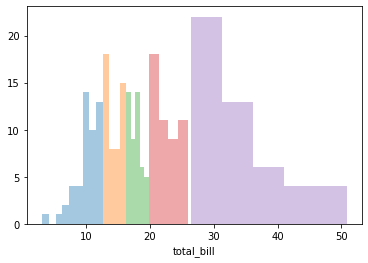

In [100]:
for i in range(1,6):
    sns.distplot(tips2[tips2['total_bill_eqfreq_encoded']==i]['total_bill'],kde=False)
plt.show()

> ## Equal Interval histogram

In [101]:
eqintv = tips2.pivot_table(
    index='total_bill_eqintv',
    aggfunc=len,
    values='tip'
)
eqintv.columns=['intv']
eqintv

,intv
total_bill_eqintv,
"(3.022, 12.618]",49.0
"(12.618, 22.166]",119.0
"(22.166, 31.714]",50.0
"(31.714, 41.262]",19.0
"(41.262, 50.81]",7.0


C:\Users\johan\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


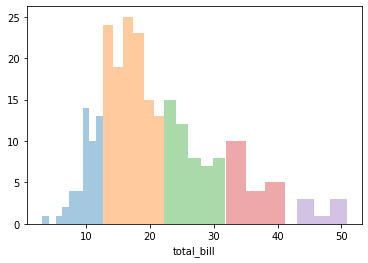

In [102]:
for i in range(1,6):
    sns.distplot(tips2[tips2['total_bill_eqintv_encoded']==i]['total_bill'],kde=False)

## Efek binding ke model

In [103]:
disk = pd.read_csv('disk.csv')
disk.head()

,x,class
0,51,0
1,19,1
2,66,1
3,35,0
4,64,1


In [104]:
disk['class'].value_counts(normalize=True)

1    0.51864
0    0.48136
Name: class, dtype: float64

In [105]:
disk['x_eqint']=pd.cut(disk['x'],7)
disk['x_eqint_encoded']=pd.cut(disk['x'],7,labels=range(1,8))

In [106]:
disk.head()

,x,class,x_eqint,x_eqint_encoded
0,51,0,"(46.0, 53.0]",5
1,19,1,"(17.951, 25.0]",1
2,66,1,"(60.0, 67.0]",7
3,35,0,"(32.0, 39.0]",3
4,64,1,"(60.0, 67.0]",7


### Normalize 0 : per row
### Normalize 1 : per kolom
### Normalize True : semua data

In [107]:
pd.crosstab(disk['x_eqint'],disk['class'],normalize=0)

class,0,1
x_eqint,,
"(17.951, 25.0]",0.224670,0.775330
"(25.0, 32.0]",0.537037,0.462963
"(32.0, 39.0]",0.835616,0.164384
"(39.0, 46.0]",0.846561,0.153439
"(46.0, 53.0]",0.583673,0.416327
"(53.0, 60.0]",0.302632,0.697368
"(60.0, 67.0]",0.068293,0.931707


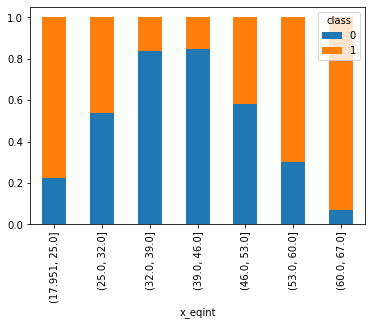

In [108]:
pd.crosstab(disk['x_eqint'],disk['class'],normalize=0).plot(kind='bar',stacked=True)
plt.show()

In [109]:
disk.describe()

,x,class
count,1529.000000,1529.000000
mean,42.809026,0.518640
std,14.299211,0.499816
min,18.000000,0.000000
25%,31.000000,0.000000
50%,44.000000,1.000000
75%,55.000000,1.000000
max,67.000000,1.000000


In [110]:
disk

,x,class,x_eqint,x_eqint_encoded
0,51,0,"(46.0, 53.0]",5
1,19,1,"(17.951, 25.0]",1
2,66,1,"(60.0, 67.0]",7
3,35,0,"(32.0, 39.0]",3
4,64,1,"(60.0, 67.0]",7
...,...,...,...,...
1524,58,1,"(53.0, 60.0]",6
1525,64,1,"(60.0, 67.0]",7
1526,47,0,"(46.0, 53.0]",5
1527,26,1,"(25.0, 32.0]",2


In [111]:
X = disk[['x']]
y = disk['class']
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=2020)

## Model 1 : Logreg Biasa

In [112]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [113]:
y_pred = logreg.predict(X_test)
print('Accuracy :',accuracy_score(y_test,y_pred))

Accuracy : 0.5822454308093995


## Model 2 : 

# Nge Bining - Tapi pake library

In [114]:
from sklearn.preprocessing import KBinsDiscretizer

### Parameter Strategy :

Nge split bin nya berdasarkan :

Uniform --> interval

Quantile --> Frequency

### Encode :

onehot --> CSR Matrix (Hemat memory) faster for running (gapake 0) (0,0)-->1  (1,1)-->1

onehot-dense --> Semua ditulis 0 nya (1,0,0,0,0,0,0)  (0,1,0,0,0,0,0)

ordinal -- > Paling hemat (cuman takut gamudeng) cuman yang angkanya 1 doang (0,1)

In [115]:
discretize = KBinsDiscretizer(n_bins=7, encode='onehot',strategy='uniform')
discretize.fit(X_train)
X_train_disc = discretize.transform(X_train)
X_test_disc = discretize.transform(X_test)

In [116]:
print(X_train_disc[:5])

  (0, 0)	1.0
  (1, 1)	1.0
  (2, 5)	1.0
  (3, 3)	1.0
  (4, 6)	1.0


In [117]:
# logreg=LogisticRegression()
logreg.fit(X_train_disc,y_train)

LogisticRegression()

In [118]:
y_disc_pred = logreg.predict(X_test_disc)
print('Accuracy :',accuracy_score(y_test,y_disc_pred))

Accuracy : 0.6997389033942559


# Missing Value

In [119]:
df = pd.DataFrame({
    'x1':[4,5,np.nan,6,7,9],
    'x2':[3,5,6,5,np.nan,5],
    'x3':[10,11,12,9,8,11],
    'x4':['A','A','C','C','D',np.nan],
    'x5':['X','Y','X','X',np.nan,'Y'],
    'x6':['M','M',np.nan,'M','N',np.nan],
    'x7':[3,5,4,5,'-',5]
    })
df

,x1,x2,x3,x4,x5,x6,x7
0,4.0,3.0,10,A,X,M,3
1,5.0,5.0,11,A,Y,M,5
2,NaN,6.0,12,C,X,NaN,4
3,6.0,5.0,9,C,X,M,5
4,7.0,NaN,8,D,NaN,N,-
5,9.0,5.0,11,NaN,Y,NaN,5


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      5 non-null      float64
 1   x2      5 non-null      float64
 2   x3      6 non-null      int64  
 3   x4      5 non-null      object 
 4   x5      5 non-null      object 
 5   x6      4 non-null      object 
 6   x7      6 non-null      object 
dtypes: float64(2), int64(1), object(4)
memory usage: 464.0+ bytes


### x7 kok object. padahal bentuknya integer. jadi harus dicek pasti ada yang - atau / atau apalah

In [121]:
from sklearn.impute import SimpleImputer

In [122]:
imp_num = SimpleImputer(strategy='mean')
df[['x1','x2','x3']]=imp_num.fit_transform(df[['x1','x2','x3']])
df

,x1,x2,x3,x4,x5,x6,x7
0,4.0,3.0,10.0,A,X,M,3
1,5.0,5.0,11.0,A,Y,M,5
2,6.2,6.0,12.0,C,X,NaN,4
3,6.0,5.0,9.0,C,X,M,5
4,7.0,4.8,8.0,D,NaN,N,-
5,9.0,5.0,11.0,NaN,Y,NaN,5


In [123]:
imp_mode = SimpleImputer(strategy='most_frequent')
df[['x4','x5']]=imp_mode.fit_transform(df[['x4','x5']])
df

,x1,x2,x3,x4,x5,x6,x7
0,4.0,3.0,10.0,A,X,M,3
1,5.0,5.0,11.0,A,Y,M,5
2,6.2,6.0,12.0,C,X,NaN,4
3,6.0,5.0,9.0,C,X,M,5
4,7.0,4.8,8.0,D,X,N,-
5,9.0,5.0,11.0,A,Y,NaN,5


In [124]:
imp_const = SimpleImputer(strategy='constant',fill_value='P')
df[['x6']]=imp_const.fit_transform(df[['x6']])
df

,x1,x2,x3,x4,x5,x6,x7
0,4.0,3.0,10.0,A,X,M,3
1,5.0,5.0,11.0,A,Y,M,5
2,6.2,6.0,12.0,C,X,P,4
3,6.0,5.0,9.0,C,X,M,5
4,7.0,4.8,8.0,D,X,N,-
5,9.0,5.0,11.0,A,Y,P,5


In [125]:
df['x7'].unique()

array([3, 5, 4, '-'], dtype=object)

### kalo mau pake missing values, harus dirubah ke np.nan dulu, karena dari library kalo - diitung object. error dia.

In [126]:
df[['x7']]=SimpleImputer(missing_values='-',strategy='constant',fill_value=np.nan).fit_transform(df[['x7']])
df[['x7']]=SimpleImputer(strategy='mean').fit_transform(df[['x7']])
df

,x1,x2,x3,x4,x5,x6,x7
0,4.0,3.0,10.0,A,X,M,3.0
1,5.0,5.0,11.0,A,Y,M,5.0
2,6.2,6.0,12.0,C,X,P,4.0
3,6.0,5.0,9.0,C,X,M,5.0
4,7.0,4.8,8.0,D,X,N,4.4
5,9.0,5.0,11.0,A,Y,P,5.0


> ## Iterative Imputer

In [127]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [128]:
df = pd.DataFrame({
    'x1':[4.3,5.1,np.nan,6.3,7.4,9.1],
    'x2':[2.9,5.1,6.3,4.9,np.nan,5.4],
    'x3':[9,11.1,np.nan,8.9,9.1,11.0],
    'x4':['A','A','C','C','D','D']
    })
df

,x1,x2,x3,x4
0,4.3,2.9,9.0,A
1,5.1,5.1,11.1,A
2,NaN,6.3,NaN,C
3,6.3,4.9,8.9,C
4,7.4,NaN,9.1,D
5,9.1,5.4,11.0,D


In [129]:
imp_iter = IterativeImputer(max_iter=10,random_state=0)
df[['x1','x2','x3']]=imp_iter.fit_transform(df[['x1','x2','x3']])
df

,x1,x2,x3,x4
0,4.30000,2.900000,9.000000,A
1,5.10000,5.100000,11.100000,A
2,7.18363,6.300000,9.823389,C
3,6.30000,4.900000,8.900000,C
4,7.40000,5.073866,9.100000,D
5,9.10000,5.400000,11.000000,D


> ## Nearest Neighbour Imputer

In [130]:
from sklearn.impute import KNNImputer

In [131]:
df = pd.DataFrame({
    'x1':[4.3,5.1,np.nan,6.3,7.4,9.1],
    'x2':[2.9,5.1,6.3,4.9,np.nan,5.4],
    'x3':[9,11.1,np.nan,8.9,9.1,11.0],
    'x4':['A','A','C','C','D','D']
    })
df

,x1,x2,x3,x4
0,4.3,2.9,9.0,A
1,5.1,5.1,11.1,A
2,NaN,6.3,NaN,C
3,6.3,4.9,8.9,C
4,7.4,NaN,9.1,D
5,9.1,5.4,11.0,D


In [132]:
imp_knn = KNNImputer(n_neighbors=2,weights='uniform')
df[['x1','x2','x3']]=imp_knn.fit_transform(df[['x1','x2','x3']])
df

,x1,x2,x3,x4
0,4.3,2.90,9.00,A
1,5.1,5.10,11.10,A
2,7.1,6.30,11.05,C
3,6.3,4.90,8.90,C
4,7.4,5.15,9.10,D
5,9.1,5.40,11.00,D


## Generate New Features : Polynomial

In [133]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [134]:
wine = pd.read_csv('white_wine.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0


In [135]:
wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      1
sulphates               1
alcohol                 1
quality                 1
dtype: int64

In [136]:
wine.dropna(inplace=True)

In [137]:
wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [138]:
wine['alcohol'].fillna(wine['alcohol'].mean(),inplace=True)
wine['label']=np.where(wine['quality']>6,1,0)
wine['label'].value_counts()

0    421
1     98
Name: label, dtype: int64

In [139]:
X = wine[['density','alcohol']]
y = wine['label']

X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state=2020)

## Model 1 : Logreg Tanpa Polynomial

In [140]:
#logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print('Accuracy Score :',accuracy_score(y_test,y_pred))

Accuracy Score : 0.8615384615384616


## Model 2 : Logreg + Polynomial

In [141]:
poly = PolynomialFeatures(degree=3,include_bias=False)
poly.fit(X_train)
X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)

In [142]:
poly.get_feature_names()

['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2', 'x0^3', 'x0^2 x1', 'x0 x1^2', 'x1^3']

In [143]:
X_train

,density,alcohol
483,0.9964,9.2
369,0.9941,11.6
160,0.9948,12.4
114,0.9968,9.1
371,0.9931,10.6
...,...,...
376,0.9969,10.4
157,0.9948,12.4
69,0.9962,9.5
347,0.9995,8.8


In [144]:
pd.DataFrame(X_train_poly, columns=poly.get_feature_names())

,x0,x1,x0^2,x0 x1,x1^2,x0^3,x0^2 x1,x0 x1^2,x1^3
0,0.9964,9.2,0.992813,9.16688,84.64,0.989239,9.133879,84.335296,778.688
1,0.9941,11.6,0.988235,11.53156,134.56,0.982404,11.463524,133.766096,1560.896
2,0.9948,12.4,0.989627,12.33552,153.76,0.984481,12.271375,152.960448,1906.624
3,0.9968,9.1,0.993610,9.07088,82.81,0.990431,9.041853,82.545008,753.571
4,0.9931,10.6,0.986248,10.52686,112.36,0.979443,10.454225,111.584716,1191.016
...,...,...,...,...,...,...,...,...,...
384,0.9969,10.4,0.993810,10.36776,108.16,0.990729,10.335620,107.824704,1124.864
385,0.9948,12.4,0.989627,12.33552,153.76,0.984481,12.271375,152.960448,1906.624
386,0.9962,9.5,0.992414,9.46390,90.25,0.988643,9.427937,89.907050,857.375
387,0.9995,8.8,0.999000,8.79560,77.44,0.998501,8.791202,77.401280,681.472


In [145]:
#logreg=LogisticRegression()
logreg.fit(X_train_poly,y_train)
y_pred = logreg.predict(X_test_poly)
print('Accuracy Score :',accuracy_score(y_test,y_pred))

Accuracy Score : 0.9461538461538461


## Contoh soal
## Polynomial Regression

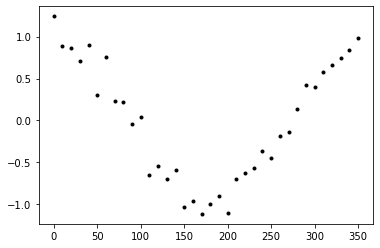

In [146]:
np.random.seed(1)
x = np.arange(0, 360, 10)
y = np.cos(x * np.pi/180) + np.random.normal(0,0.15,len(x))
df_poly = pd.DataFrame({'x':x, 'y':y})
plt.plot(df_poly['x'], df_poly['y'], 'k.')
plt.show()


In [147]:
lrp = LinearRegression()
rip = Ridge(alpha=1)
lap = Lasso(alpha=2)

lrp.fit(df_poly[['x']], df_poly['y'])
rip.fit(df_poly[['x']], df_poly['y'])
lap.fit(df_poly[['x']], df_poly['y'])


Lasso(alpha=2)

In [148]:
# lrp = LinearRegression()
# rip = Ridge(alpha=1)
# lap = Lasso(alpha=2)
# elap = ElasticNet(alpha=3, l1_ratio=0.3)

# bedain cell

# lrp.fit(df_poly[['x']], df_poly['y'])
# rip.fit(df_poly[['x']], df_poly['y'])
# lap.fit(df_poly[['x']], df_poly['y'])
# elap.fit(df_poly[['x']], df_poly['y'])

# bedain cell

# df_poly['linear'] = lrp.predict(df_poly[['x']])
# df_poly['ridge'] = rip.predict(df_poly[['x']])
# df_poly['lasso'] = lap.predict(df_poly[['x']])
# df_poly['elastic'] = elap.predict(df_poly[['x']])

# bedain cell

# plt.figure(figsize=(10,6))
# plt.scatter(df_poly['x'], df_poly['y'])
# plt.plot(df_poly['x'], df_poly['linear'], 'r--', label='LinearRegression')
# plt.plot(df_poly['x'], df_poly['ridge'], 'b-', label='Ridge')
# plt.plot(df_poly['x'], df_poly['lasso'], 'g--', label='Lasso')
# plt.plot(df_poly['x'], df_poly['elastic'], 'm--', label='ElasticNet')
# plt.legend()
# plt.show()

In [149]:
df_poly['linear'] = lrp.predict(df_poly[['x']])
df_poly['ridge'] = rip.predict(df_poly[['x']])
df_poly['lasso'] = lap.predict(df_poly[['x']])


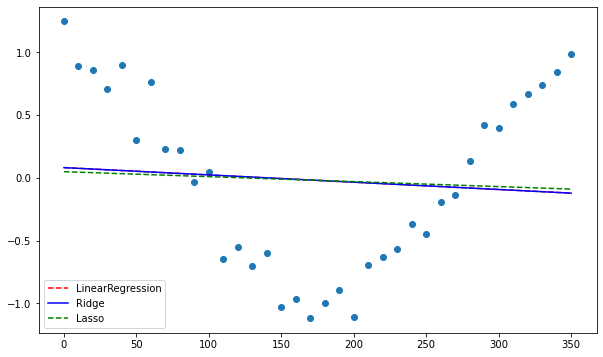

In [150]:
plt.figure(figsize=(10,6))
plt.scatter(df_poly['x'], df_poly['y'])
plt.plot(df_poly['x'], df_poly['linear'], 'r--', label='LinearRegression')
plt.plot(df_poly['x'], df_poly['ridge'], 'b-', label='Ridge')
plt.plot(df_poly['x'], df_poly['lasso'], 'g--', label='Lasso')
plt.legend()
plt.show()


### Bengkok kan. Modelnya gabisa ngikutin. Jelek. makanya dipakai in polynomial

In [151]:
df_poly.head()

,x,y,linear,ridge,lasso
0,0,1.243652,0.080355,0.080354,0.047922
1,10,0.893044,0.074548,0.074548,0.043969
2,20,0.860467,0.068741,0.068741,0.040015
3,30,0.705080,0.062935,0.062934,0.036062
4,40,0.895856,0.057128,0.057128,0.032109


In [152]:
poly=PolynomialFeatures(degree=5,include_bias=False)
feature_poly = poly.fit_transform(df_poly[['x']])
poly_df = pd.DataFrame(feature_poly, columns = poly.get_feature_names())
poly_df['y']=df_poly['y']
poly_df.head()

,x0,x0^2,x0^3,x0^4,x0^5,y
0,0.0,0.0,0.0,0.0,0.0,1.243652
1,10.0,100.0,1000.0,10000.0,100000.0,0.893044
2,20.0,400.0,8000.0,160000.0,3200000.0,0.860467
3,30.0,900.0,27000.0,810000.0,24300000.0,0.705080
4,40.0,1600.0,64000.0,2560000.0,102400000.0,0.895856


In [153]:
lr_poly = lrp.fit(poly_df[['x0','x0^2','x0^3','x0^4','x0^5']],poly_df['y'])
poly_df['y_pred']=lr_poly.predict(poly_df[['x0','x0^2','x0^3','x0^4','x0^5']])
hahaha = lr_poly.predict(poly_df[['x0','x0^2','x0^3','x0^4','x0^5']])
poly_df.head()

,x0,x0^2,x0^3,x0^4,x0^5,y,y_pred
0,0.0,0.0,0.0,0.0,0.0,1.243652,1.037293
1,10.0,100.0,1000.0,10000.0,100000.0,0.893044,1.025498
2,20.0,400.0,8000.0,160000.0,3200000.0,0.860467,0.968435
3,30.0,900.0,27000.0,810000.0,24300000.0,0.705080,0.874245
4,40.0,1600.0,64000.0,2560000.0,102400000.0,0.895856,0.750582


In [154]:
hahaha

array([ 1.03729264,  1.02549824,  0.96843531,  0.87424479,  0.75058224,
        0.60461574,  0.44302387,  0.2719936 ,  0.09721829, -0.0761044 ,
       -0.24327458, -0.40009216, -0.54285894, -0.66838062, -0.77396892,
       -0.85744359, -0.9171345 , -0.95188368, -0.96104739, -0.94449816,
       -0.90262687, -0.83634481, -0.74708571, -0.63680784, -0.50799603,
       -0.36366375, -0.20735517, -0.04314721,  0.12434841,  0.28998308,
        0.44806928,  0.59237848,  0.71613913,  0.81203455,  0.87220092,
        0.88822517])

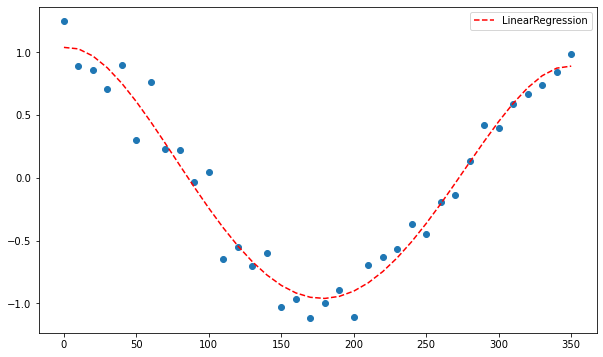

In [155]:
plt.figure(figsize=(10,6))
plt.scatter(poly_df['x0'], poly_df['y'])
plt.plot(poly_df['x0'], poly_df['y_pred'], 'r--', label='LinearRegression')
plt.legend()
plt.show()
# print('Accuracy Score :',accuracy_score(y,hahaha))

## Apply Several Preprocessing Method to Modeling at once Part 2

In [156]:
adult = pd.read_csv('adult.csv')
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [157]:
adult['income'].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [158]:
adult.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [159]:
adult.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [160]:
adult['education.num'].value_counts()

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education.num, dtype: int64

> ## Missing Value

> ### benerin yang '?'

In [161]:
adult.replace('?',np.nan,inplace=True)

In [162]:
adult.isna().sum()/len(adult)

age               0.000000
workclass         0.056386
fnlwgt            0.000000
education         0.000000
education.num     0.000000
marital.status    0.000000
occupation        0.056601
relationship      0.000000
race              0.000000
sex               0.000000
capital.gain      0.000000
capital.loss      0.000000
hours.per.week    0.000000
native.country    0.017905
income            0.000000
dtype: float64

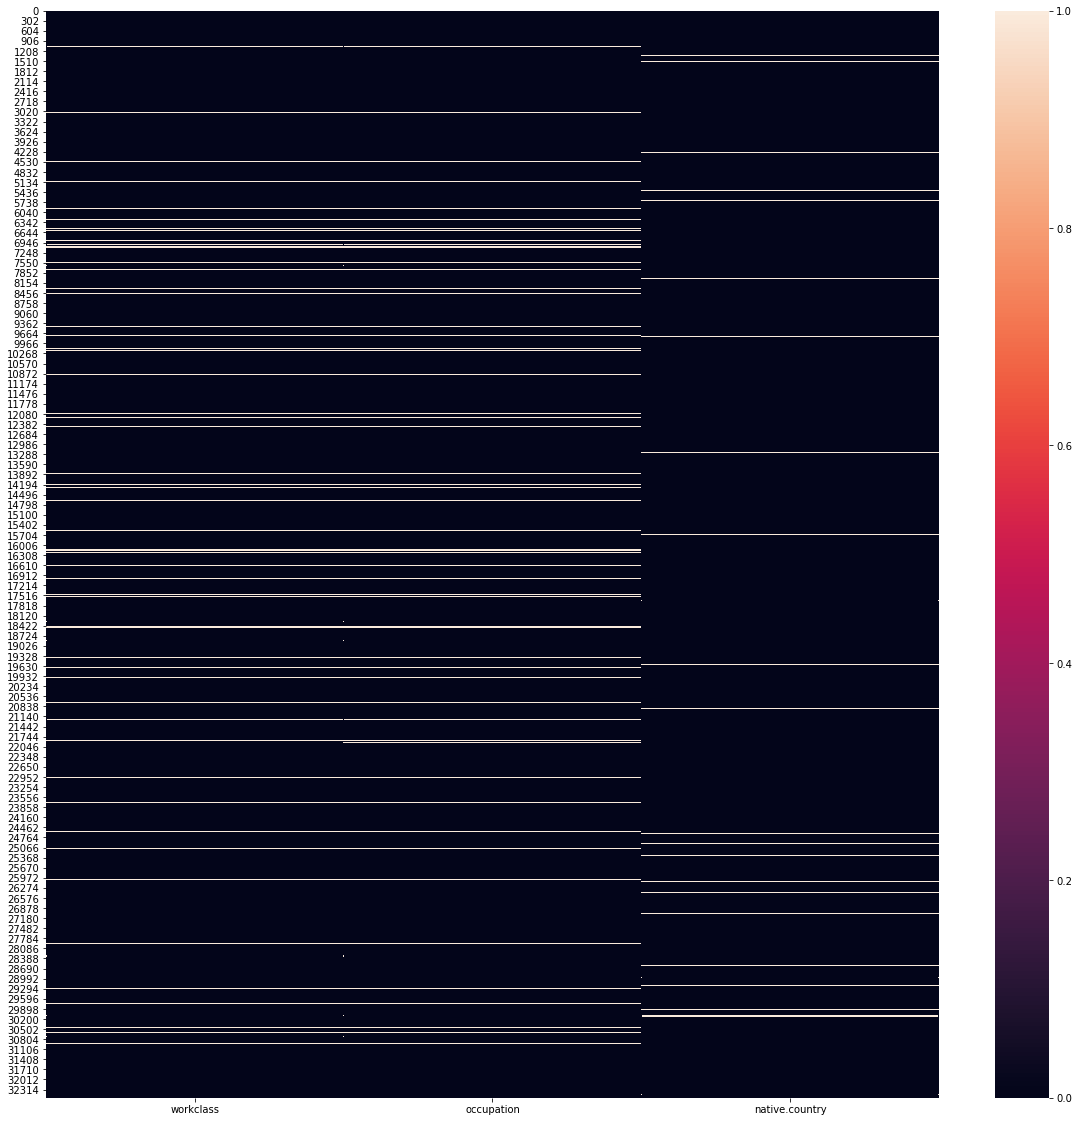

In [163]:
plt.figure(figsize=(20,20))
sns.heatmap(adult[['workclass','occupation','native.country']].isna())
plt.show()

Missing Value :
1. workclass
1. occupation
1. native.country

> ## Preprocessing

In [164]:
categorical_features = adult.columns[adult.dtypes==object]
adult[categorical_features].describe()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
count,30725,32561,32561,30718,32561,32561,32561,31978,32561
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [165]:
categorical_features

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country', 'income'],
      dtype='object')

In [166]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

Preprocessing scheme :
1. One hot encoding : relationship, race, sex
1. binary encoding : workclass, marital status, occupation, native country
1. ordinal encoding : education (already encoded)
1. no treatment : size

In [167]:
binary_encoder_pipeline = Pipeline([
        ('imputer',SimpleImputer(strategy='constant',fill_value='NC')),
        ('binary',ce.BinaryEncoder())
])

transformer = ColumnTransformer([
    ('onehot',OneHotEncoder(drop='first'),['relationship','race','sex']),
    ('binary_pipe',binary_encoder_pipeline,['workclass','marital.status','occupation','native.country']
    )
],remainder='passthrough')

> ## Data Splitting

In [168]:
X = adult.drop(columns = ['fnlwgt', 'income', 'education'], axis=1)
y = np.where(adult['income']=='>50K', 1, 0)

In [169]:
y

array([0, 0, 0, ..., 1, 0, 0])

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=10)

> ## Data Transformation

In [171]:
X_train.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
29849,20,Private,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States
30319,20,Private,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,55,United-States
1878,47,State-gov,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,15024,0,50,United-States
20686,50,Self-emp-not-inc,10,Divorced,Exec-managerial,Unmarried,Asian-Pac-Islander,Female,0,0,40,NaN
26007,39,Private,10,Never-married,Machine-op-inspct,Other-relative,Asian-Pac-Islander,Male,0,0,40,Philippines


In [172]:
X_train_preprocessed = transformer.fit_transform(X_train)
X_test_preprocessed = transformer.transform(X_test)

In [173]:
X_train_preprocessed = pd.DataFrame(X_train_preprocessed)
X_test_preprocessed = pd.DataFrame(X_test_preprocessed)
X_train_preprocessed

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,20.0,10.0,0.0,0.0,10.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,20.0,9.0,0.0,0.0,55.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,47.0,16.0,15024.0,0.0,50.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,50.0,10.0,0.0,0.0,40.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,39.0,10.0,0.0,0.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24415,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,31.0,10.0,0.0,0.0,35.0
24416,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,23.0,12.0,0.0,0.0,16.0
24417,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,38.0,11.0,0.0,0.0,40.0
24418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,47.0,9.0,0.0,0.0,40.0


In [174]:
transformer.transformers_

[('onehot', OneHotEncoder(drop='first'), ['relationship', 'race', 'sex']),
 ('binary_pipe',
  Pipeline(steps=[('imputer',
                   SimpleImputer(fill_value='NC', strategy='constant')),
                  ('binary', BinaryEncoder())]),
  ['workclass', 'marital.status', 'occupation', 'native.country']),
 ('remainder', 'passthrough', [0, 2, 8, 9, 10])]

In [175]:
transformer.transformers_[0][1].get_feature_names()

array(['x0_Not-in-family', 'x0_Other-relative', 'x0_Own-child',
       'x0_Unmarried', 'x0_Wife', 'x1_Asian-Pac-Islander', 'x1_Black',
       'x1_Other', 'x1_White', 'x2_Male'], dtype=object)

In [176]:
transformer.transformers_[1][1]['binary'].get_feature_names()

['0_0',
 '0_1',
 '0_2',
 '0_3',
 '0_4',
 '1_0',
 '1_1',
 '1_2',
 '1_3',
 '2_0',
 '2_1',
 '2_2',
 '2_3',
 '2_4',
 '3_0',
 '3_1',
 '3_2',
 '3_3',
 '3_4',
 '3_5',
 '3_6']

In [177]:
features = list(transformer.transformers_[0][1].get_feature_names()) + transformer.transformers_[1][1]['binary'].get_feature_names() + 'age education.num capital.gain capital.loss hours.per.week'.split()
len(features)

36

In [178]:
X_train_preprocessed.columns = features
X_test_preprocessed.columns = features
X_train_preprocessed

,x0_Not-in-family,x0_Other-relative,x0_Own-child,x0_Unmarried,x0_Wife,x1_Asian-Pac-Islander,x1_Black,x1_Other,x1_White,x2_Male,...,3_2,3_3,3_4,3_5,3_6,age,education.num,capital.gain,capital.loss,hours.per.week
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,20.0,10.0,0.0,0.0,10.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,20.0,9.0,0.0,0.0,55.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,47.0,16.0,15024.0,0.0,50.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,50.0,10.0,0.0,0.0,40.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,39.0,10.0,0.0,0.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24415,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,31.0,10.0,0.0,0.0,35.0
24416,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,23.0,12.0,0.0,0.0,16.0
24417,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,38.0,11.0,0.0,0.0,40.0
24418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,47.0,9.0,0.0,0.0,40.0


> ## Model Fitting & Evaluation

In [179]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train_preprocessed, y_train)

DecisionTreeClassifier(max_depth=3)

In [180]:
y_pred = model.predict(X_test_preprocessed)
print('Accuracy', accuracy_score(y_test, y_pred))

Accuracy 0.8355238914138312


In [181]:
pd.DataFrame(y_test)

,0
0,0
1,1
2,0
3,0
4,1
...,...
8136,0
8137,0
8138,0
8139,0


> ## Model Properties

In [182]:
importance_table = pd.DataFrame({
    'imp':model.feature_importances_
},index=features)
importance_table.sort_values('imp',ascending=False)

,imp
1_3,0.472094
capital.gain,0.264498
education.num,0.261116
age,0.002291
3_1,0.000000
2_1,0.000000
2_2,0.000000
2_3,0.000000
2_4,0.000000
3_0,0.000000


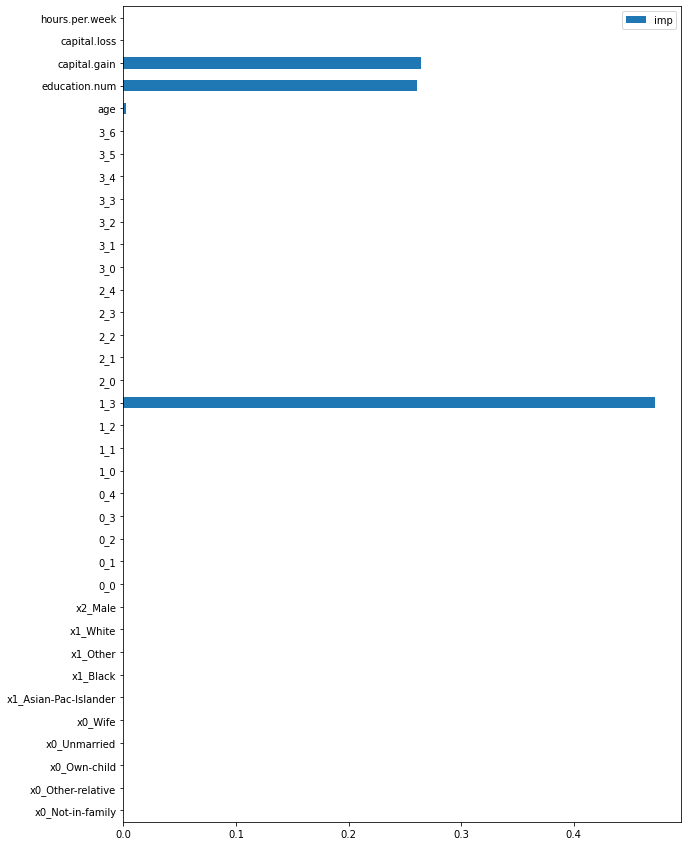

In [183]:
importance_table.plot(kind='barh',figsize=(10,15))
plt.show()

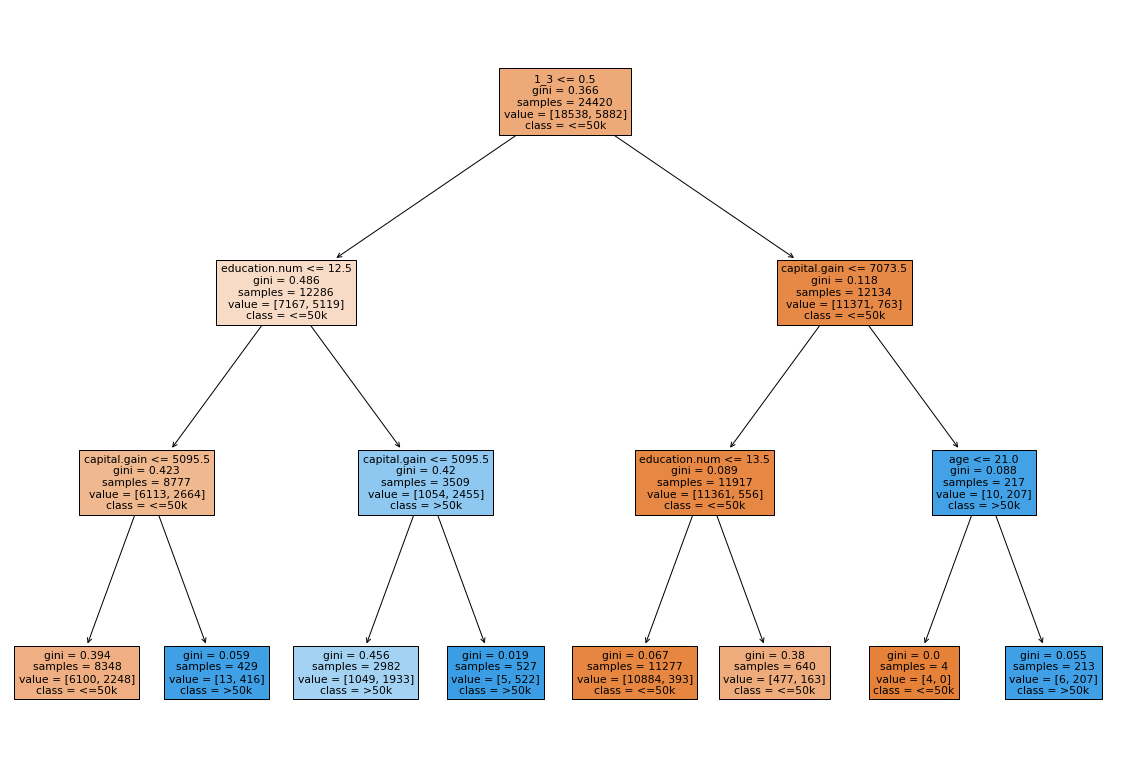

In [184]:
plt.figure(figsize=(20,14))
plot_tree(model, feature_names= features, filled=True,class_names=['<=50k','>50k'])
plt.show()

In [185]:
df_poly.head()

,x,y,linear,ridge,lasso
0,0,1.243652,0.080355,0.080354,0.047922
1,10,0.893044,0.074548,0.074548,0.043969
2,20,0.860467,0.068741,0.068741,0.040015
3,30,0.705080,0.062935,0.062934,0.036062
4,40,0.895856,0.057128,0.057128,0.032109


# Feature Selection

In [186]:
from sklearn.feature_selection import SelectPercentile

<img src='lat21jan.png'>

> ## Univariate Statistics Feature Selection

In [187]:
select = SelectPercentile(percentile=50)
select.fit(X_train_preprocessed,y_train)

C:\Users\johan\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [10 15 19 24] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\johan\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


SelectPercentile(percentile=50)

In [188]:
X_train_selected = select.transform(X_train_preprocessed)
X_test_selected = select.transform(X_test_preprocessed)

In [189]:
print('Before Selection', X_train_preprocessed.shape)
print('After Selection', X_train_selected.shape)

Before Selection (24420, 36)
After Selection (24420, 18)


In [190]:
mask = select.get_support()
mask

array([ True,  True,  True,  True,  True, False,  True, False,  True,
        True, False, False, False,  True, False, False,  True,  True,
        True, False, False, False, False,  True, False, False, False,
       False, False, False, False,  True,  True,  True,  True,  True])

In [191]:
selected_features = pd.DataFrame({
    'indicator':mask,
    'features':features,
    'score':select.scores_
})
selected_features.sort_values('score',ascending=False)
# selected_features[selected_features['indicator']==True]

,indicator,features,score
18,True,1_3,5040.645368
17,True,1_2,3556.433987
32,True,education.num,3069.155418
31,True,age,1413.928353
35,True,hours.per.week,1392.032516
2,True,x0_Own-child,1347.522879
33,True,capital.gain,1308.928733
9,True,x2_Male,1170.742103
0,True,x0_Not-in-family,886.311260
3,True,x0_Unmarried,526.323271


> ## Model Fitting & Evaluation

In [192]:
model = LogisticRegression(max_iter=1000, solver='liblinear',C=10)
model.fit(X_train_selected, y_train)
print('Score :', model.score(X_test_selected, y_test))

Score : 0.8383490971625107


In [193]:
accuracy_score(y_test, model.predict(X_test_selected))

0.8383490971625107

In [194]:
model2 = LogisticRegression(max_iter=1000, solver='liblinear',C=10)
model2.fit(X_train_preprocessed, y_train)
print('Score :', model2.score(X_test_preprocessed, y_test))

Score : 0.8398231175531261


## __Recursive Feature Selection__

In [195]:
from sklearn.feature_selection import RFE

In [196]:
selector = RFE(model2, n_features_to_select = 10, step=1)
selector.fit(X_train_preprocessed,y_train)
selector.support_

array([ True,  True,  True,  True,  True, False, False,  True, False,
        True, False,  True, False, False, False, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False])

In [197]:
rfe_df = pd.DataFrame({
    'indicator':selector.support_,
    'features':X_train_preprocessed.columns,
    'score':select.scores_
})
selected = rfe_df[rfe_df['indicator']==True]['features']
selected

0      x0_Not-in-family
1     x0_Other-relative
2          x0_Own-child
3          x0_Unmarried
4               x0_Wife
7              x1_Other
9               x2_Male
11                  0_1
17                  1_2
25                  3_1
Name: features, dtype: object

In [198]:
model3 = LogisticRegression(max_iter=1000, solver='liblinear',C=10)
model3.fit(X_train_preprocessed[selected], y_train)
print('Score :', model3.score(X_test_preprocessed[selected], y_test))

Score : 0.7592433361994841
